In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_HVN_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1302,2024-05-27,24200,25350,24000,25150,6719200
1303,2024-05-28,25300,26900,24500,26900,9317700
1304,2024-05-29,26900,28450,26900,28300,6449500
1305,2024-05-30,28300,28500,26800,27700,6116600


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.9 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(128, return_sequences=True, input_shape=(time_step, 1)))
model_rnn.add(Dropout(0.5))  
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.3896 - val_loss: 0.0139
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0969 - val_loss: 0.0014
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0461 - val_loss: 0.0027
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0374 - val_loss: 0.0015
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0318 - val_loss: 0.0049
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0207 - val_loss: 0.0035
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0211 - val_loss: 0.0017
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0148 - val_loss: 0.0016
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0153 - val_loss: 0.0037
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0137 - val_loss: 0.0024
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0109 - val_loss: 0.0023
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 1254.8255374473915
MAPE: 4.5448332822970325 %
MSLE: 0.003294247113679443


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.13923421 0.1717477  0.16983514 0.15835979 0.15070956 0.15070956
 0.148797   0.15453467 0.148797   0.14497189 0.148797   0.148797
 0.14497189 0.15070956 0.15070956 0.14688444 0.14497189 0.14497189
 0.15070956 0.14688444 0.15070956 0.148797   0.14688444 0.14114677
 0.14114677 0.15262212 0.148797   0.15070956 0.16218491 0.16218491
 0.15835979 0.15644723 0.15453467 0.15070956 0.16027235 0.15644723
 0.15453467 0.15453467 0.15835979 0.19087327 0.19087327 0.17557281
 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839 0.18704816
 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304 0.18322304
 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742
 0.23103699 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861
 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 

7 day output [[0.79287994]]
8 day input [0.148797   0.14497189 0.148797   0.148797   0.14497189 0.15070956
 0.15070956 0.14688444 0.14497189 0.14497189 0.15070956 0.14688444
 0.15070956 0.148797   0.14688444 0.14114677 0.14114677 0.15262212
 0.148797   0.15070956 0.16218491 0.16218491 0.15835979 0.15644723
 0.15453467 0.15070956 0.16027235 0.15644723 0.15453467 0.15453467
 0.15835979 0.19087327 0.19087327 0.17557281 0.1717477  0.18322304
 0.1851356  0.19087327 0.19469839 0.18704816 0.18131048 0.17557281
 0.18131048 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304
 0.18131048 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397
 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675
 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419
 0.31327698 0.32283977 0.33240256 0.33049    0.33240256 0.37830394
 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137
 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044
 0.53513369 0.57720996

15 day output [[0.8442687]]
16 day input [0.14497189 0.14497189 0.15070956 0.14688444 0.15070956 0.148797
 0.14688444 0.14114677 0.14114677 0.15262212 0.148797   0.15070956
 0.16218491 0.16218491 0.15835979 0.15644723 0.15453467 0.15070956
 0.16027235 0.15644723 0.15453467 0.15453467 0.15835979 0.19087327
 0.19087327 0.17557281 0.1717477  0.18322304 0.1851356  0.19087327
 0.19469839 0.18704816 0.18131048 0.17557281 0.18131048 0.1851356
 0.18322304 0.18322304 0.18322304 0.18322304 0.18131048 0.1851356
 0.18704816 0.2214742  0.23103699 0.21382397 0.24442489 0.28267605
 0.29032628 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186
 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977
 0.33240256 0.33049    0.33240256 0.37830394 0.42611789 0.4528937
 0.42420533 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276
 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996
 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397
 0.74499309 0.75462425 0.76

23 day output [[0.8784504]]
24 day input [0.14114677 0.15262212 0.148797   0.15070956 0.16218491 0.16218491
 0.15835979 0.15644723 0.15453467 0.15070956 0.16027235 0.15644723
 0.15453467 0.15453467 0.15835979 0.19087327 0.19087327 0.17557281
 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839 0.18704816
 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304 0.18322304
 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742
 0.23103699 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861
 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349
 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256 0.33049
 0.33240256 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161
 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741
 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414
 0.69961366 0.75316528 0.73021459 0.7340397  0.74499309 0.75462425
 0.76016414 0.76310444 0.77547193 0.78184342 0.78706288 0.79287994
 0.79999614 0.80800378 0.

32 day output [[0.90655935]]
33 day input [0.15070956 0.16027235 0.15644723 0.15453467 0.15453467 0.15835979
 0.19087327 0.19087327 0.17557281 0.1717477  0.18322304 0.1851356
 0.19087327 0.19469839 0.18704816 0.18131048 0.17557281 0.18131048
 0.1851356  0.18322304 0.18322304 0.18322304 0.18322304 0.18131048
 0.1851356  0.18704816 0.2214742  0.23103699 0.21382397 0.24442489
 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675 0.34770302
 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698
 0.32283977 0.33240256 0.33049    0.33240256 0.37830394 0.42611789
 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137 0.50453276
 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369
 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459
 0.7340397  0.74499309 0.75462425 0.76016414 0.76310444 0.77547193
 0.78184342 0.78706288 0.79287994 0.79999614 0.80800378 0.81176114
 0.81821573 0.81967771 0.83202195 0.83951604 0.84426868 0.84930933
 0.85315657 0.853912 

40 day output [[0.93082273]]
41 day input [0.17557281 0.1717477  0.18322304 0.1851356  0.19087327 0.19469839
 0.18704816 0.18131048 0.17557281 0.18131048 0.1851356  0.18322304
 0.18322304 0.18322304 0.18322304 0.18131048 0.1851356  0.18704816
 0.2214742  0.23103699 0.21382397 0.24442489 0.28267605 0.29032628
 0.28458861 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163
 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256
 0.33049    0.33240256 0.37830394 0.42611789 0.4528937  0.42420533
 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276
 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554
 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397  0.74499309
 0.75462425 0.76016414 0.76310444 0.77547193 0.78184342 0.78706288
 0.79287994 0.79999614 0.80800378 0.81176114 0.81821573 0.81967771
 0.83202195 0.83951604 0.84426868 0.84930933 0.85315657 0.853912
 0.85556769 0.86235511 0.8652612  0.87262928 0.87845039 0.88306582
 0.88377941 0.8901366 

48 day output [[0.944566]]
49 day input [0.17557281 0.18131048 0.1851356  0.18322304 0.18322304 0.18322304
 0.18322304 0.18131048 0.1851356  0.18704816 0.2214742  0.23103699
 0.21382397 0.24442489 0.28267605 0.29032628 0.28458861 0.30562675
 0.30562675 0.34770302 0.30945186 0.30180163 0.28076349 0.2712007
 0.30371419 0.31327698 0.32283977 0.33240256 0.33049    0.33240256
 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603
 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299
 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366
 0.75316528 0.73021459 0.7340397  0.74499309 0.75462425 0.76016414
 0.76310444 0.77547193 0.78184342 0.78706288 0.79287994 0.79999614
 0.80800378 0.81176114 0.81821573 0.81967771 0.83202195 0.83951604
 0.84426868 0.84930933 0.85315657 0.853912   0.85556769 0.86235511
 0.8652612  0.87262928 0.87845039 0.88306582 0.88377941 0.8901366
 0.89203489 0.89467299 0.89955759 0.90250087 0.90552711 0.90655935
 0.9123317  0.91355801 0

56 day output [[0.9571738]]
57 day input [0.1851356  0.18704816 0.2214742  0.23103699 0.21382397 0.24442489
 0.28267605 0.29032628 0.28458861 0.30562675 0.30562675 0.34770302
 0.30945186 0.30180163 0.28076349 0.2712007  0.30371419 0.31327698
 0.32283977 0.33240256 0.33049    0.33240256 0.37830394 0.42611789
 0.4528937  0.42420533 0.46628161 0.44715603 0.45863137 0.50453276
 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369
 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459
 0.7340397  0.74499309 0.75462425 0.76016414 0.76310444 0.77547193
 0.78184342 0.78706288 0.79287994 0.79999614 0.80800378 0.81176114
 0.81821573 0.81967771 0.83202195 0.83951604 0.84426868 0.84930933
 0.85315657 0.853912   0.85556769 0.86235511 0.8652612  0.87262928
 0.87845039 0.88306582 0.88377941 0.8901366  0.89203489 0.89467299
 0.89955759 0.90250087 0.90552711 0.90655935 0.9123317  0.91355801
 0.91618991 0.9201194  0.92351747 0.92464137 0.92638004 0.93082273
 0.93180776 0.9347307

64 day output [[0.9666804]]
65 day input [0.28458861 0.30562675 0.30562675 0.34770302 0.30945186 0.30180163
 0.28076349 0.2712007  0.30371419 0.31327698 0.32283977 0.33240256
 0.33049    0.33240256 0.37830394 0.42611789 0.4528937  0.42420533
 0.46628161 0.44715603 0.45863137 0.50453276 0.50453276 0.50453276
 0.49305741 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554
 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397  0.74499309
 0.75462425 0.76016414 0.76310444 0.77547193 0.78184342 0.78706288
 0.79287994 0.79999614 0.80800378 0.81176114 0.81821573 0.81967771
 0.83202195 0.83951604 0.84426868 0.84930933 0.85315657 0.853912
 0.85556769 0.86235511 0.8652612  0.87262928 0.87845039 0.88306582
 0.88377941 0.8901366  0.89203489 0.89467299 0.89955759 0.90250087
 0.90552711 0.90655935 0.9123317  0.91355801 0.91618991 0.9201194
 0.92351747 0.92464137 0.92638004 0.93082273 0.93180776 0.93473077
 0.93652308 0.93740737 0.93906772 0.94223833 0.94404173 0.94456601
 0.9471153  0.94975841 0

72 day output [[0.9774442]]
73 day input [0.30371419 0.31327698 0.32283977 0.33240256 0.33049    0.33240256
 0.37830394 0.42611789 0.4528937  0.42420533 0.46628161 0.44715603
 0.45863137 0.50453276 0.50453276 0.50453276 0.49305741 0.51218299
 0.51027044 0.53513369 0.57720996 0.59633554 0.63267414 0.69961366
 0.75316528 0.73021459 0.7340397  0.74499309 0.75462425 0.76016414
 0.76310444 0.77547193 0.78184342 0.78706288 0.79287994 0.79999614
 0.80800378 0.81176114 0.81821573 0.81967771 0.83202195 0.83951604
 0.84426868 0.84930933 0.85315657 0.853912   0.85556769 0.86235511
 0.8652612  0.87262928 0.87845039 0.88306582 0.88377941 0.8901366
 0.89203489 0.89467299 0.89955759 0.90250087 0.90552711 0.90655935
 0.9123317  0.91355801 0.91618991 0.9201194  0.92351747 0.92464137
 0.92638004 0.93082273 0.93180776 0.93473077 0.93652308 0.93740737
 0.93906772 0.94223833 0.94404173 0.94456601 0.9471153  0.94975841
 0.95187926 0.95235062 0.95355618 0.95539403 0.95599294 0.95717382
 0.95914853 0.95960462

80 day output [[0.98377013]]
81 day input [0.4528937  0.42420533 0.46628161 0.44715603 0.45863137 0.50453276
 0.50453276 0.50453276 0.49305741 0.51218299 0.51027044 0.53513369
 0.57720996 0.59633554 0.63267414 0.69961366 0.75316528 0.73021459
 0.7340397  0.74499309 0.75462425 0.76016414 0.76310444 0.77547193
 0.78184342 0.78706288 0.79287994 0.79999614 0.80800378 0.81176114
 0.81821573 0.81967771 0.83202195 0.83951604 0.84426868 0.84930933
 0.85315657 0.853912   0.85556769 0.86235511 0.8652612  0.87262928
 0.87845039 0.88306582 0.88377941 0.8901366  0.89203489 0.89467299
 0.89955759 0.90250087 0.90552711 0.90655935 0.9123317  0.91355801
 0.91618991 0.9201194  0.92351747 0.92464137 0.92638004 0.93082273
 0.93180776 0.93473077 0.93652308 0.93740737 0.93906772 0.94223833
 0.94404173 0.94456601 0.9471153  0.94975841 0.95187926 0.95235062
 0.95355618 0.95539403 0.95599294 0.95717382 0.95914853 0.95960462
 0.96062362 0.96257412 0.96359837 0.96355903 0.9654696  0.96668041
 0.96878242 0.969639

88 day output [[0.99458015]]
89 day input [0.49305741 0.51218299 0.51027044 0.53513369 0.57720996 0.59633554
 0.63267414 0.69961366 0.75316528 0.73021459 0.7340397  0.74499309
 0.75462425 0.76016414 0.76310444 0.77547193 0.78184342 0.78706288
 0.79287994 0.79999614 0.80800378 0.81176114 0.81821573 0.81967771
 0.83202195 0.83951604 0.84426868 0.84930933 0.85315657 0.853912
 0.85556769 0.86235511 0.8652612  0.87262928 0.87845039 0.88306582
 0.88377941 0.8901366  0.89203489 0.89467299 0.89955759 0.90250087
 0.90552711 0.90655935 0.9123317  0.91355801 0.91618991 0.9201194
 0.92351747 0.92464137 0.92638004 0.93082273 0.93180776 0.93473077
 0.93652308 0.93740737 0.93906772 0.94223833 0.94404173 0.94456601
 0.9471153  0.94975841 0.95187926 0.95235062 0.95355618 0.95539403
 0.95599294 0.95717382 0.95914853 0.95960462 0.96062362 0.96257412
 0.96359837 0.96355903 0.9654696  0.96668041 0.96878242 0.96963906
 0.97126448 0.97333658 0.97314394 0.97584832 0.97602475 0.97744417
 0.97695982 0.97856581 

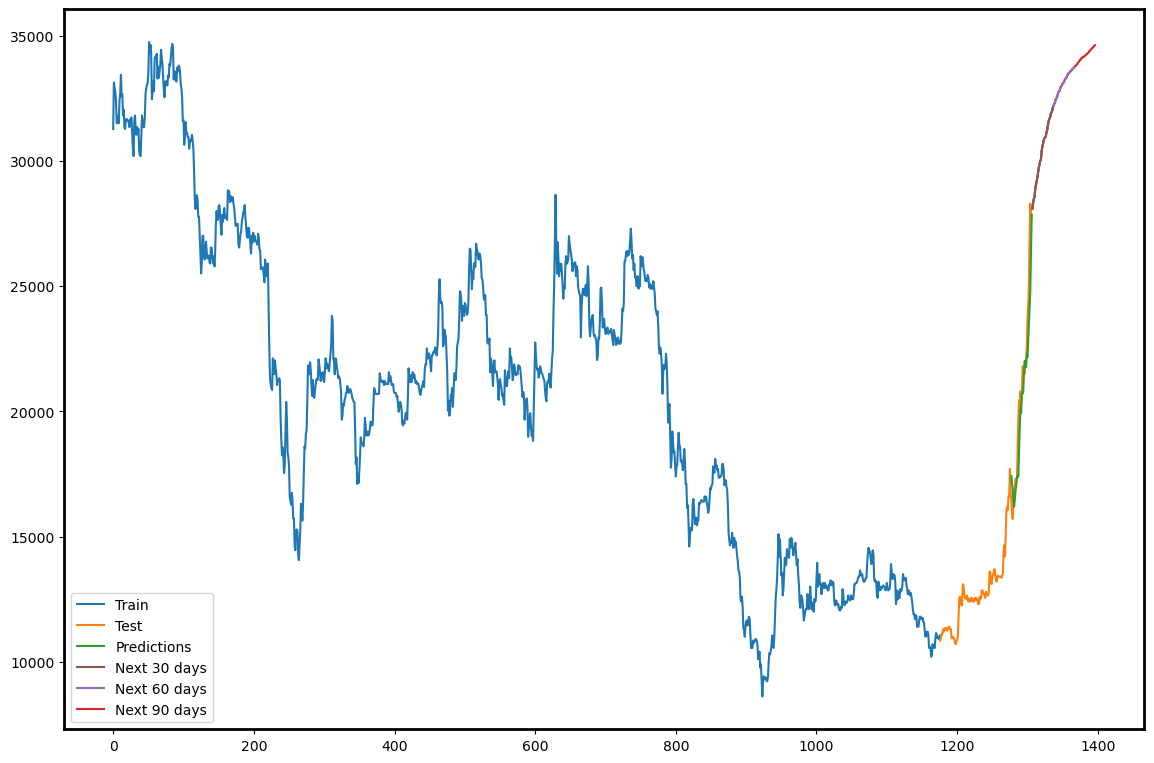

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_HVN_91.png")
plt.show()